### <strong>專題 ：以蒙地卡羅實驗驗證 J-B 檢定統計量</strong>
學號：410979068

姓名：施尚丞

<hr>

 <font color= skyblue, fontweight='bold'>作品目標</font>： <br> 

這個作品的目標是透過多次實驗，深入體驗針對函數不同特徵所產生的統計量檢定力的差異。進一步，希望透過科學數值的分析，理解在不同特徵的情況下，為何某些檢定可能表現較不準確。將以蒙地卡羅實驗的方式模擬大量樣本，應用不同統計檢定方法，其中包括著名的 J-B 檢定。

在這個過程中將著重於選擇特徵，並深入了解為什麼在某些情況下，某些檢定的表現相對較差。通過科學數值的分析，將獲得各檢定的檢定力強度。同時，透過視覺化工具，例如圖片，我們將能夠更清楚地理解為何在某些情況下檢定存在漏洞。

最終得出結論，指出在各種情境下，J-B 檢定可能是檢定力最佳的方法。同時，透過前兩個實驗探討偏度和峰度，我們將能夠詳細了解 J-B 檢定的特性和構成原理，使得整體分析更為全面。


<hr>
蒙地卡羅實驗驗證J-B檢定統計量步驟：

1. 生成隨機樣本： 使用一個已知分佈（例如正態分佈）的隨機數生成器，生成一組樣本數據。

2. 計算樣本的J-B檢定統計量： 使用生成的樣本數據計算J-B檢定統計量。這通常涉及到計算樣本的偏度和峰度，然後使用這些值計算J-B統計量。

3. 重複實驗： 重複上述步驟多次，生成多個樣本，每次都計算相應的J-B檢定統計量。

4. 統計結果： 收集所有實驗中計算得到的J-B檢定統計量，並進行統計分析。

5. 比較結果： 將實驗中得到的統計結果與J-B檢定的理論期望值進行比較。如果實驗中得到的統計量與理論期望值相符，則說明樣本數據在統計上符合正態分佈。
<hr>

1.令 $\{x_i, i=1,\cdots, n\}$ 代表來自標準常態 N(0,1) 的 n 個隨機樣本。統計量 G_1 表示為

G_1 = $\sqrt{\frac{n}{6}} \hat{s}$，

其中 $\hat{s}$ 為偏態係數（skewness）的估計值（參考指令 scipy.stats.skew）。請利用蒙地卡羅模擬（Monte Carlo Simulation）驗證統計量 G_1 服從標準常態 N(0,1)。其中蒙地卡羅模擬的環境設定（scenarios）為：
樣本數 n = 10, 20, 30, 50, 100, 300, 500, 1000。

針對每個樣本數 n，模擬次數皆為 N=50,000。

繪製 n = 10 與 n = 500 時，統計量 G_1 的直方圖與 ECDF 圖。並分別畫上對應的標準常態 PDF 與 CDF 圖。

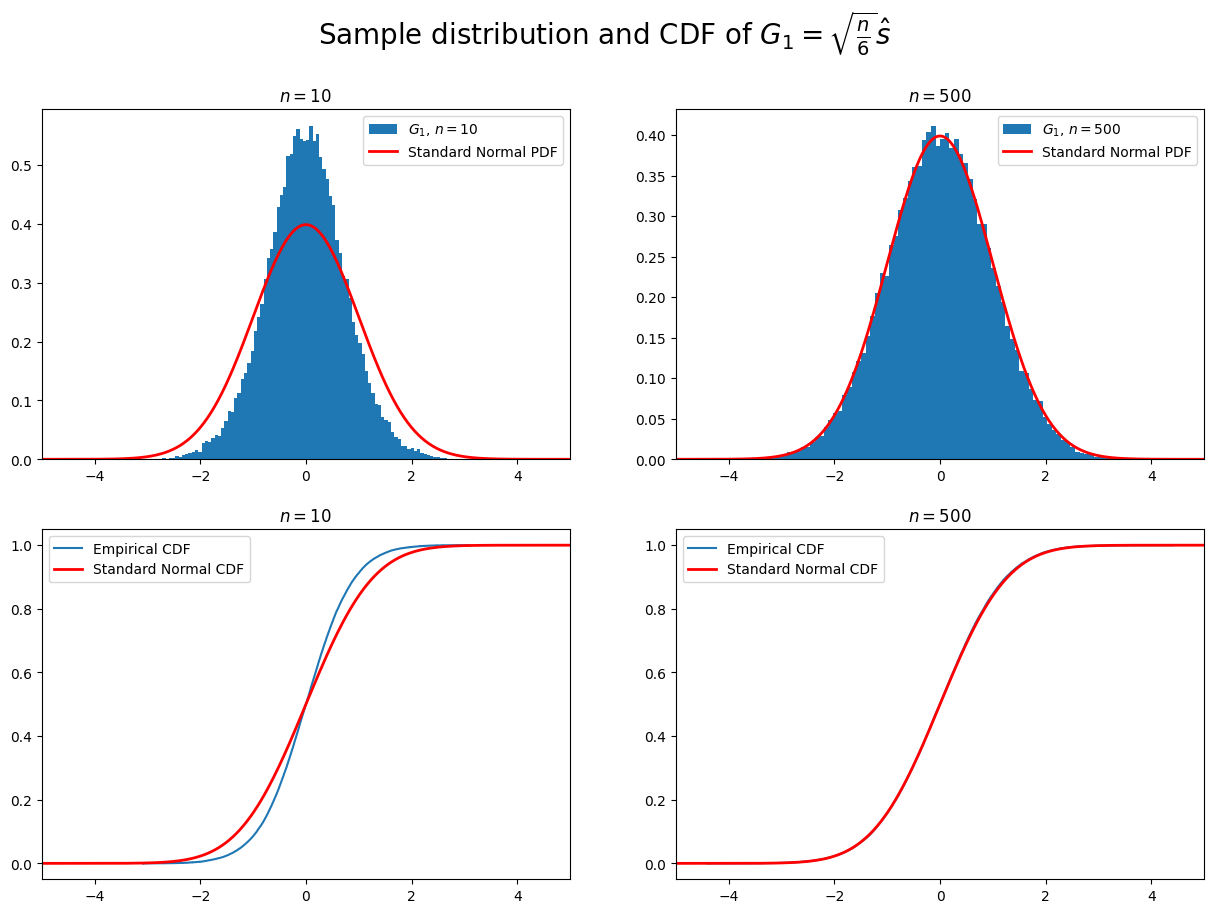

In [205]:
from scipy.stats import norm, skew
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n_values = [10, 500]  # 樣本大小

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
xn = np.linspace(-5, 5, 300)  # 調整x軸範圍，以便更好地顯示常態分佈

for i, n_val in enumerate(n_values):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n_val))

    # 計算 g1
    g1 = np.sqrt(n_val / 6) * skew(x, axis=1)
    g1_sort = np.sort(g1)
    y = np.arange(1, N + 1) / N
    y_ = norm.cdf(g1_sort, loc=0, scale=1)  # 使用常態分佈的CDF

    # 第一章：統計量 G_1 的直方圖
    ax[0, i].hist(g1, bins=100, density=True, label=f'$G_1$, $n = {n_val}$')

    # 第二章：ECDF 圖
    ax[1, i].plot(g1_sort, y, label='Empirical CDF', drawstyle='steps-pre')

    # 繪製常態分佈
    ax[0, i].plot(xn, norm.pdf(xn, loc=0, scale=1), label='Standard Normal PDF', linewidth=2, color='red')

    # 繪製常態分佈的CDF
    ax[1, i].plot(xn, norm.cdf(xn, loc=0, scale=1), label='Standard Normal CDF', linewidth=2, color='red')

    ax[0, i].legend()
    ax[1, i].legend()
    ax[0, i].set_xlim(-5, 5)
    ax[1, i].set_xlim(-5, 5)
    ax[0, i].set_title(f'$n = {n_val}$')
    ax[1, i].set_title(f'$n = {n_val}$')

plt.suptitle(r'Sample distribution and CDF of $G_1 = \sqrt{\frac{n}{6}} \hat{s}$', fontsize=20)
plt.show()



**<font color=skyblue>注意事項與討論：</font>**
- G1 分布的形狀
透過直方圖 (PDF 圖) 可以觀察 G1 值的分布形狀。由於樣本來自標準常態分佈，理論上 G1 的期望值應該為 0。因此，我們預期 G1 分布的中心應該接近 0。

- 樣本大小對估計的影響
對於不同的樣本大小，可以觀察到 G1 分布的變化。較小的樣本可能會產生更大的變異，而較大的樣本可能會使估計更加穩定。

- ECDF 曲線與標準常態分佈的比較
透過 ECDF 圖， G1 的實際經驗累積分布函數越來越接近標準常態分佈的理論累積分布函數。
<hr>

2. 同上，但令統計量為
$G_2 = \sqrt{\frac{n}{24}} (\hat{k} - 3)$ ，
其中 $\hat{k}$ 為峰態係數（Kurtosis）的估計值（參考指令 scipy.stats.kurtosis）。同樣利用蒙地卡羅模擬，驗證統計量 G_2 服從標準常態 N(0,1)。蒙地卡羅模擬的環境設定同上。

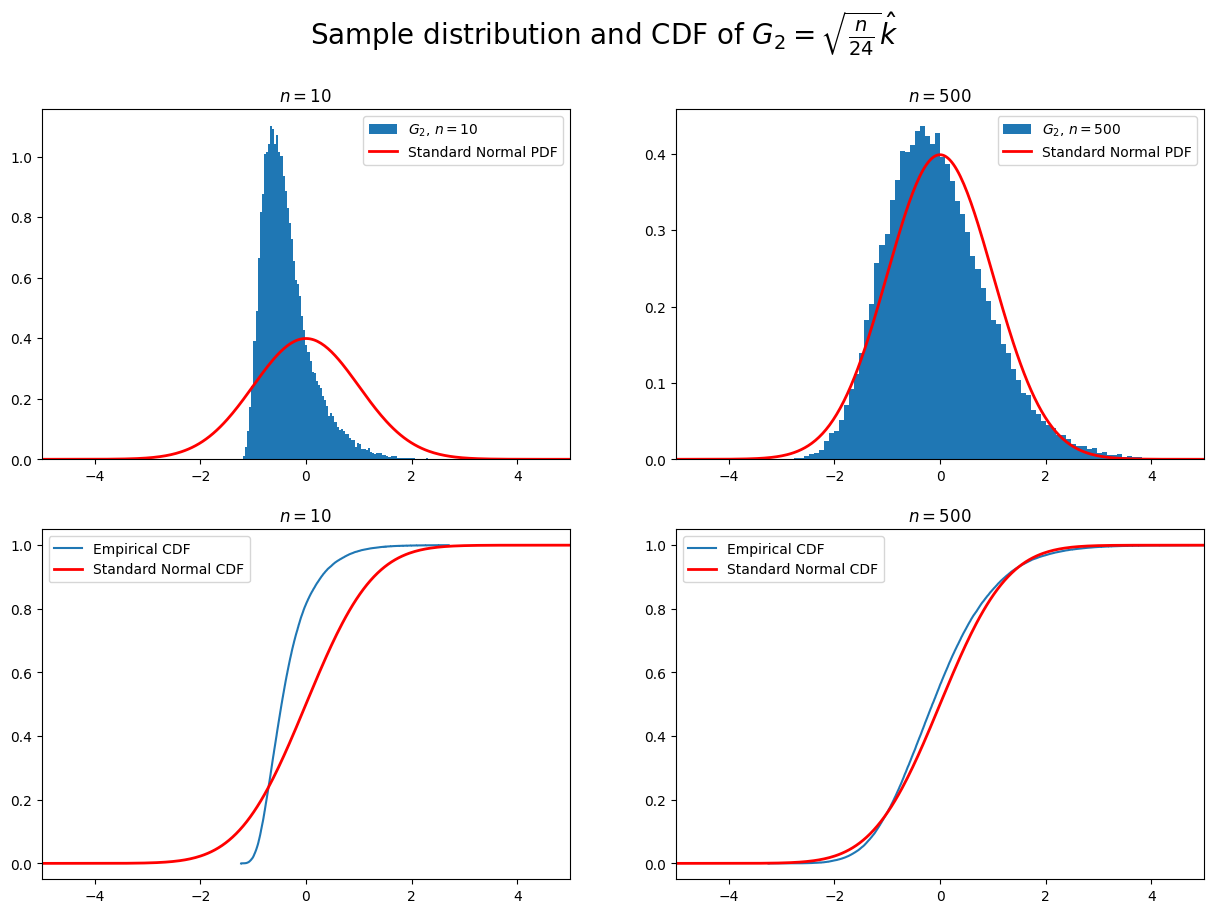

In [206]:
from scipy.stats import norm, skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n_values = [10, 500]  # 樣本大小

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
xn = np.linspace(-5, 5, 300)  # 調整x軸範圍，以便更好地顯示常態分佈

for i, n_val in enumerate(n_values):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n_val))

    # 計算 g2
    g2 = np.sqrt(n_val / 24) * kurtosis(x, axis=1, fisher=True)
    g2_sort = np.sort(g2)
    y = np.arange(1, N + 1) / N
    y_ = norm.cdf(g2_sort, loc=0, scale=1)  # 使用常態分佈的CDF

    # 第一章：統計量 G_2 的直方圖
    ax[0, i].hist(g2, bins=100, density=True, label=f'$G_2$, $n = {n_val}$')

    # 第二章：ECDF 圖
    ax[1, i].plot(g2_sort, y, label='Empirical CDF', drawstyle='steps-pre')

    # 繪製常態分佈
    ax[0, i].plot(xn, norm.pdf(xn, loc=0, scale=1), label='Standard Normal PDF', linewidth=2, color='red')

    # 繪製常態分佈的CDF
    ax[1, i].plot(xn, norm.cdf(xn, loc=0, scale=1), label='Standard Normal CDF', linewidth=2, color='red')

    ax[0, i].legend()
    ax[1, i].legend()
    ax[0, i].set_xlim(-5, 5)
    ax[1, i].set_xlim(-5, 5)
    ax[0, i].set_title(f'$n = {n_val}$')
    ax[1, i].set_title(f'$n = {n_val}$')

plt.suptitle(r'Sample distribution and CDF of $G_2 = \sqrt{\frac{n}{24}} \hat{k}$', fontsize=20)
plt.show()






**<font color=skyblue>注意事項：</font>**
- 環境設定和參數設定同上，僅G1改為G2。

**<font color=skyblue>討論：</font>**

- 統計量 G2 的分布形狀:
這顯示了統計量G2的分佈情況。當樣本大小增加時，分佈更接近常態分佈。
- ECDF 曲線與標準常態分佈的比較
透過 ECDF 圖， G2 的實際經驗累積分布函數越來越接近標準常態分佈的理論累積分布函數。

<hr>

3. 同上，但統計量為

G_3 = G_1^2 + G_2^2 = \frac{n}{6} \left(\hat{s}^2 +\frac{(\hat{k} - 3)^2}{4}\right) ，

同樣利用上述的蒙地卡羅模擬，驗證統計量 G_3 服從卡方分配 \chi^2(2)。G_3 為著名的 J-B (Jarque-Bera) 常態檢定統計量。

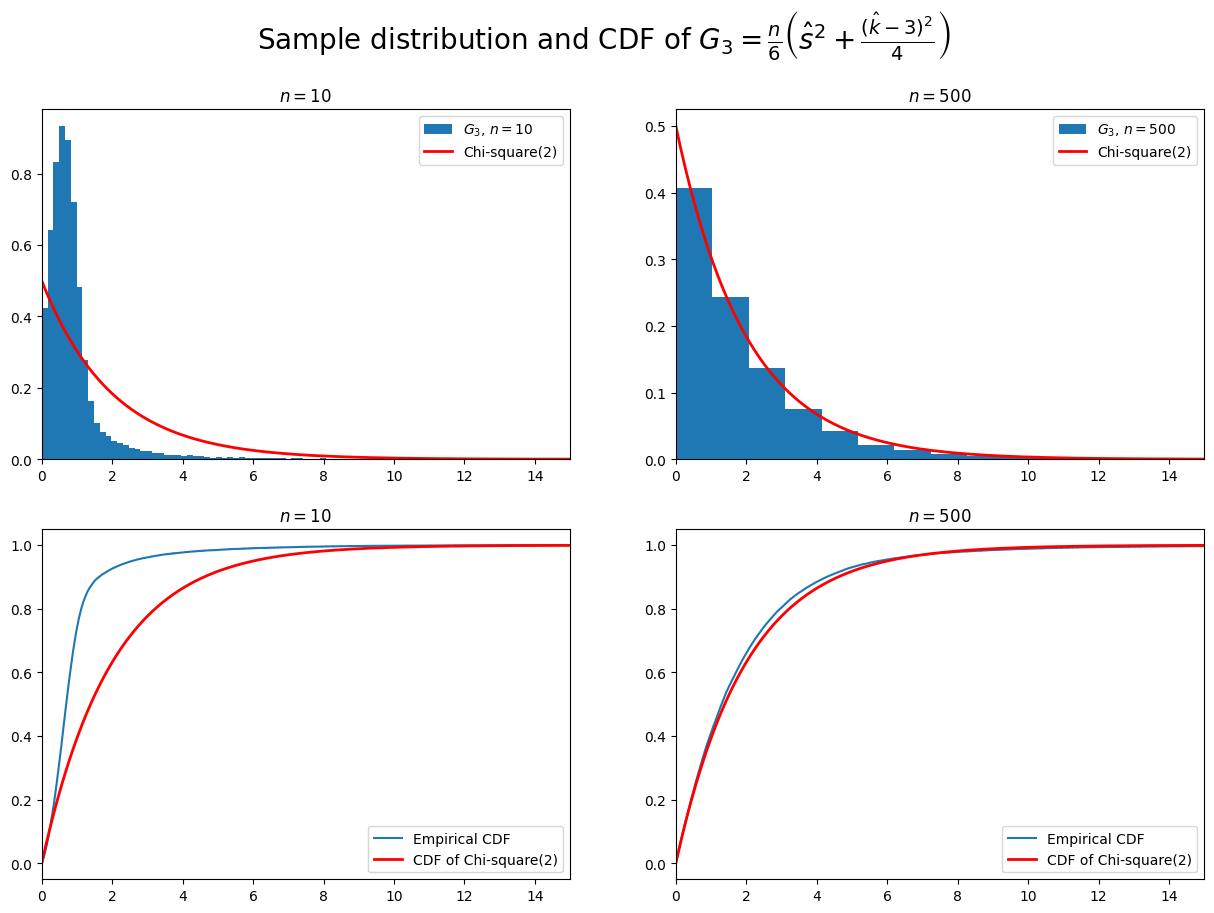

In [210]:
from scipy.stats import norm, skew, kurtosis, chi2
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n_values = [10, 500]  # 樣本大小

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
xn = np.linspace(0, 20, 300)  # 調整x軸範圍，以便更好地顯示卡方分佈

for i, n_val in enumerate(n_values):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n_val))

    # 計算 g3
    g3 = (n_val / 6) * (skew(x, axis=1) ** 2 + (kurtosis(x, axis=1, fisher=True) ** 2) / 4)
    g3_sort = np.sort(g3)
    y = np.arange(1, len(g3_sort) + 1) / len(g3_sort)
    y_ = chi2.cdf(g3_sort, df=2)  # 使用卡方分佈的CDF

    # 第一章：統計量 G_3 的直方圖
    ax[0, i].hist(g3, bins=100, density=True, label=f'$G_3$, $n = {n_val}$')

    # 第二章：ECDF 圖
    ax[1, i].plot(g3_sort, y, label='Empirical CDF', drawstyle='steps-pre')

    # 繪製卡方分佈
    ax[0, i].plot(xn, chi2.pdf(xn, df=2), label='Chi-square(2)', linewidth=2, color='red')

    # 繪製卡方分佈的CDF
    ax[1, i].plot(g3_sort, y_, label='CDF of Chi-square(2)', linewidth=2, color='red')

    ax[0, i].legend()
    ax[1, i].legend()
    ax[0, i].set_xlim(0, 15)
    ax[1, i].set_xlim(0, 15)
    ax[0, i].set_title(f'$n = {n_val}$')
    ax[1, i].set_title(f'$n = {n_val}$')

plt.suptitle(r'Sample distribution and CDF of $G_3 = \frac{n}{6} \left(\hat{s}^2 + \frac{(\hat{k}-3)^2}{4}\right)$', fontsize=20)
plt.show()





**<font color=skyblue>注意事項：</font>**
- 環境設定和參數設定大致同上，僅G2改為G3，且將常態分佈換成卡方。

**<font color=skyblue>討論：</font>**

- 統計量 G3 的分布形狀:
這顯示了統計量G3的分佈情況。當樣本大小增加時，分佈更接近常態分佈。
- ECDF 曲線與標準常態分佈的比較
透過 ECDF 圖， G3 的實際經驗累積分布函數越來越接近卡方分佈的理論累積分布函數。

### 結論：驗證統計量 $G_3$ 服從卡方分配 $\chi^2(2)$

<hr>

其他想法:調整n的大小，觀察G1、G2以及G3的統計量直方圖，並且觀察其趨勢。

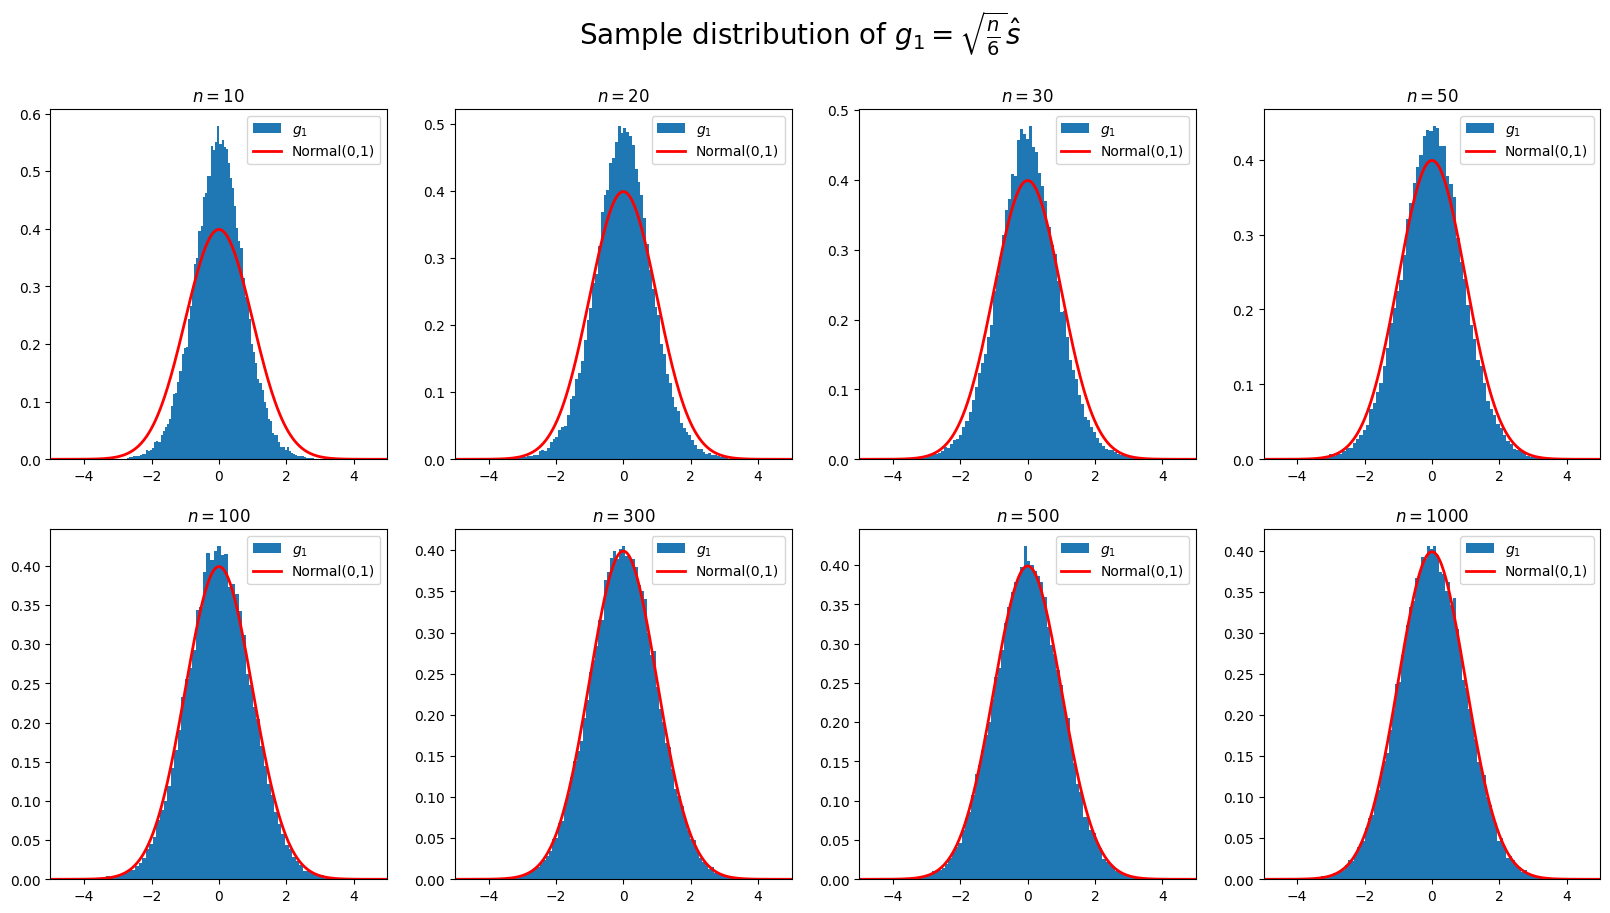

In [201]:
from scipy.stats import norm, skew, kurtosis, chi2
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # 樣本大小

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
xn = np.linspace(-5, 5, 300)  # 調整x軸範圍，以便更好地顯示常態分佈

for i, axi in enumerate(ax.flat):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n[i]))
    
    # 計算 g1
    g1 = np.sqrt(n[i] / 6) * skew(x, axis=1)
    
    # 繪製直方圖
    axi.hist(g1, bins=100, density=True, label=r'$g_1$')

    # 繪製常態分佈
    axi.plot(xn, norm.pdf(xn, loc=0, scale=1), label='Normal(0,1)', linewidth=2, color="red")

    axi.legend()
    axi.set_xlim(-5, 5)
    axi.set_title(r'$n = %d$' % n[i])

plt.suptitle(r'Sample distribution of $g_1 = \sqrt{\frac{n}{6}} \hat{s}$', fontsize=20)
plt.show()





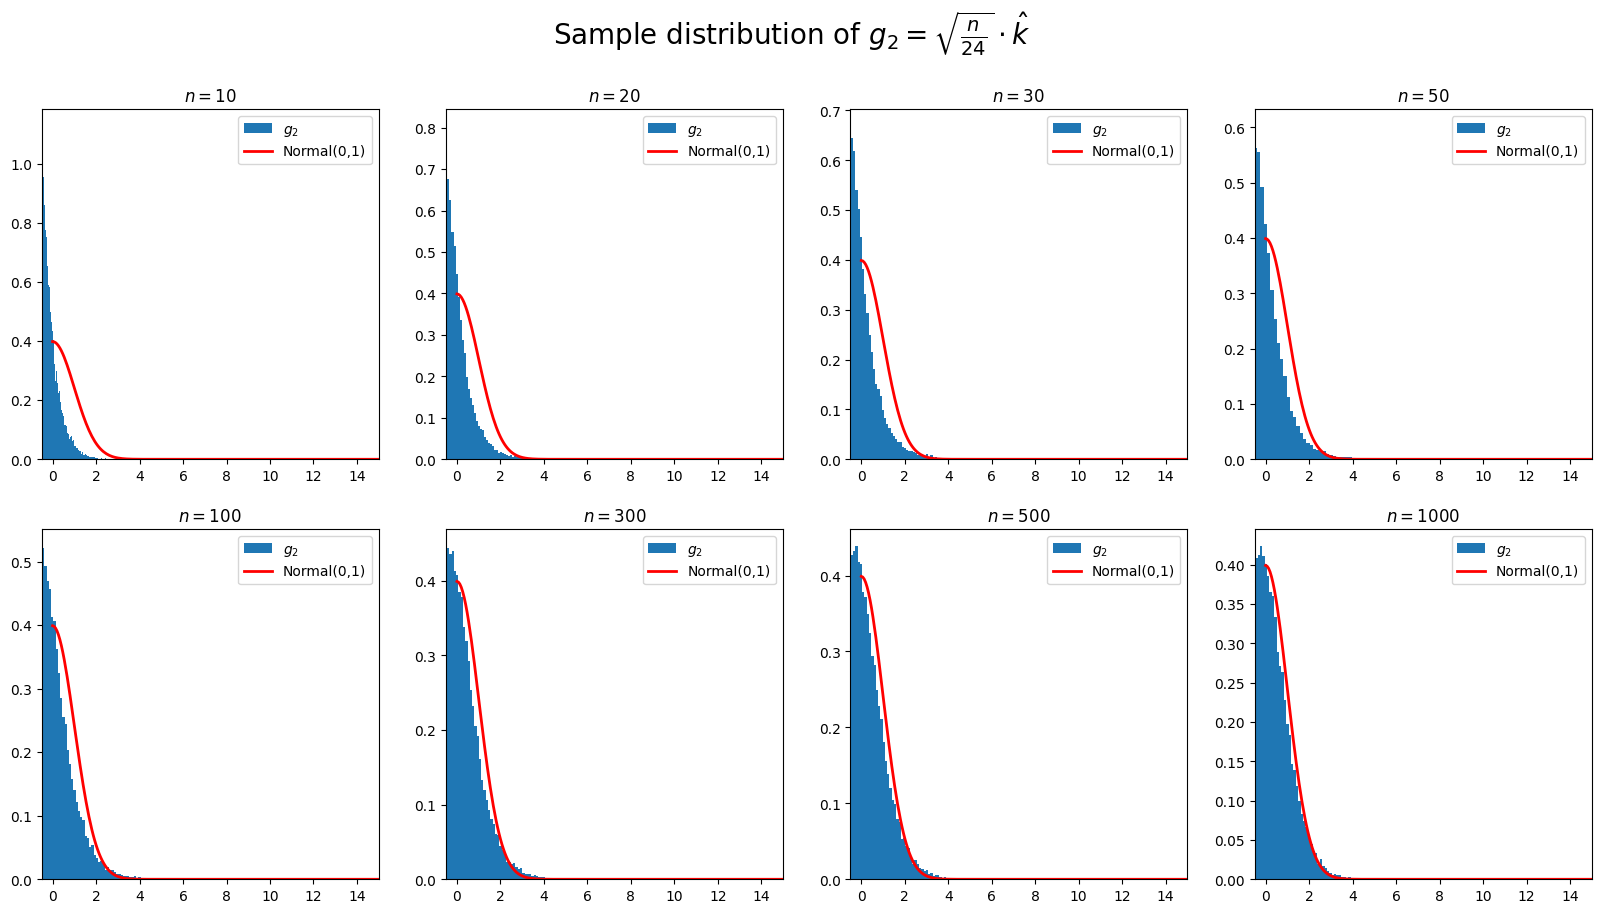

In [200]:
from scipy.stats import norm, skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # 樣本大小

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
xn = np.linspace(0, 20, 300)

for i, axi in enumerate(ax.flat):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n[i]))
    # 計算 g2
    g2 = np.sqrt(n[i] / 24) * kurtosis(x, axis=1, fisher=True)

    # 繪製直方圖
    axi.hist(g2, bins=100, density=True, label=r'$g_2$')

    # 繪製常態分佈
    axi.plot(xn, norm.pdf(xn, loc=0, scale=1), label='Normal(0,1)', linewidth=2, color="red")

    axi.legend()
    axi.set_xlim(-0.5, 15)
    axi.set_title(r'$n = %d$' % n[i])

plt.suptitle(r'Sample distribution of $g_2 = \sqrt{\frac{n}{24}} \cdot \hat{k}$', fontsize=20)
plt.show()


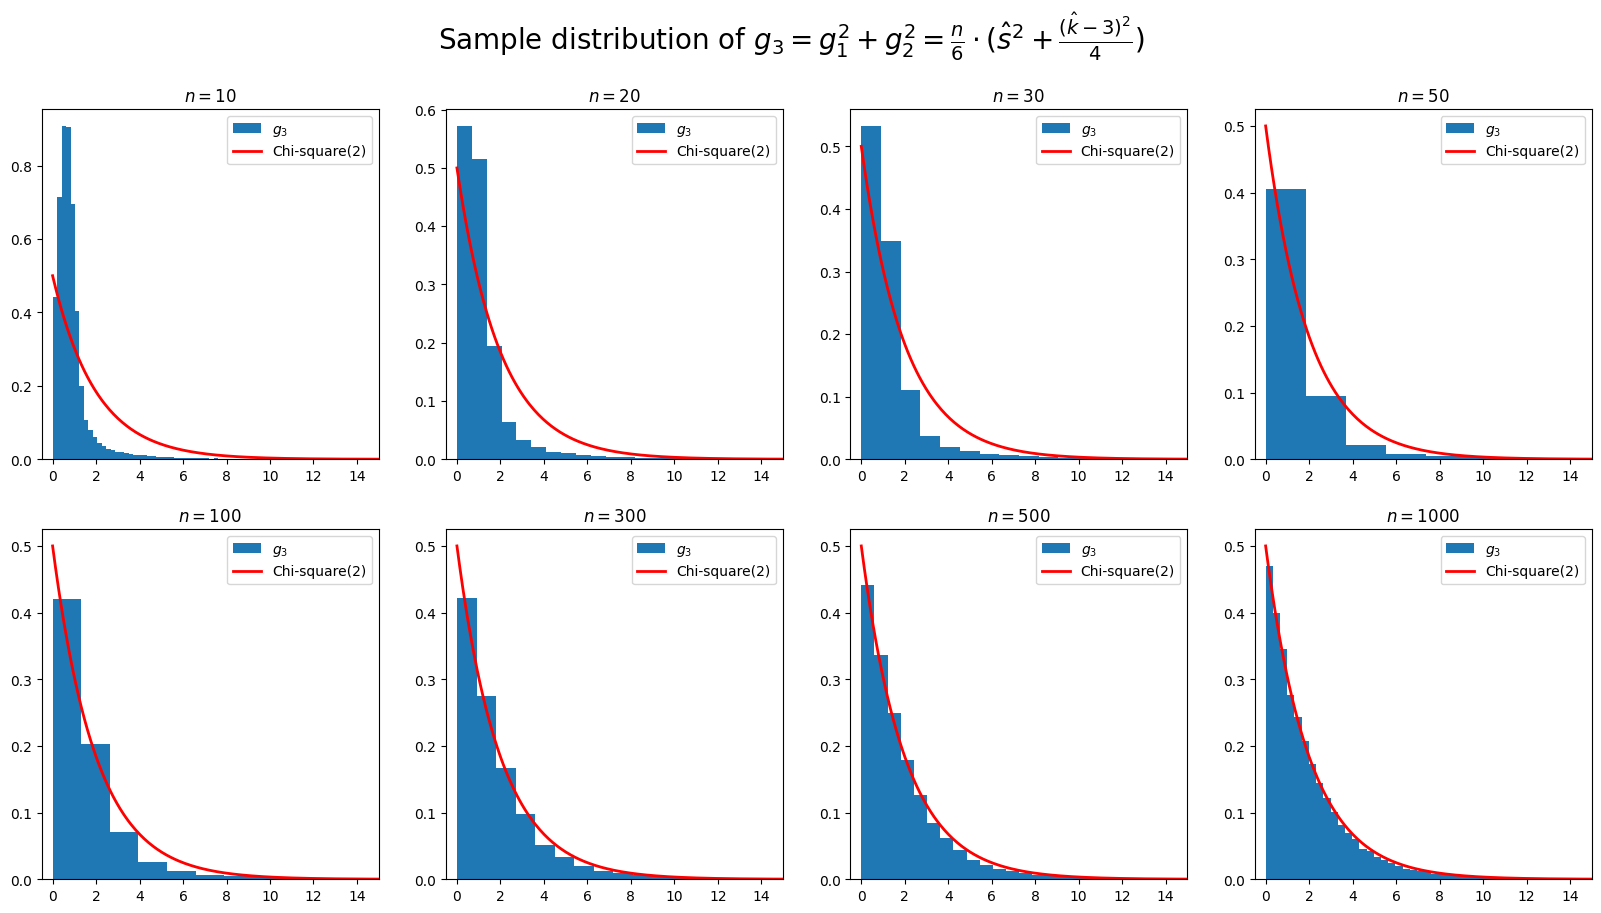

In [194]:
from scipy.stats import norm,skew,kurtosis,chi2
import numpy as np
import matplotlib.pyplot as plt


N = 50000 #experiment times
n = [10,20,30,50,100,300,500,1000] #sample size

fig, ax = plt.subplots(2,4,figsize=(20,10))
xn = np.linspace(0,20,300)

for i,axi in enumerate(ax.flat):
    # generate random numbers
    x = norm.rvs(loc=0, scale=1,size = (N,n[i]))
    g3 = (n[i]/6)*(skew(x,axis=1)**2+(kurtosis(x,axis=1,fisher=True)**2)/4)
    #g1 = np.sqrt(n[i]/6)*skew(x,axis=1)
    #g2 = np.sqrt(n[i]/24)*kurtosis(x,axis=1,fisher=True)
    #g3 = g1**2+g2**2

    # plot histogram
    axi.hist(g3,bins=100,density=True,label=r'$g_3$')

    #plot chi-square distribution
    axi.plot(xn,chi2.pdf(xn,df=2),label='Chi-square(2)',linewidth=2,color="red")

    axi.legend()
    axi.set_xlim(-0.5,15)
    axi.set_title(r'$n = %d$'%n[i])


plt.suptitle(r'Sample distribution of $g_3 = g_1^2 + g_2^2 = \frac{n}{6} \cdot (\hat{s}^2+\frac{(\hat{k}-3)^2}{4})$',fontsize=20)
plt.show()


**<font color=skyblue>討論：</font>**

這樣更容易發現，當n越大時，G1、G2的統計量直方圖越趨近於常態分佈，而G3的統計量直方圖越趨近於卡方分佈。


<hr>

其他想法:調整n的大小，觀察G1、G2以及G3的ECDF，並且觀察其趨勢。

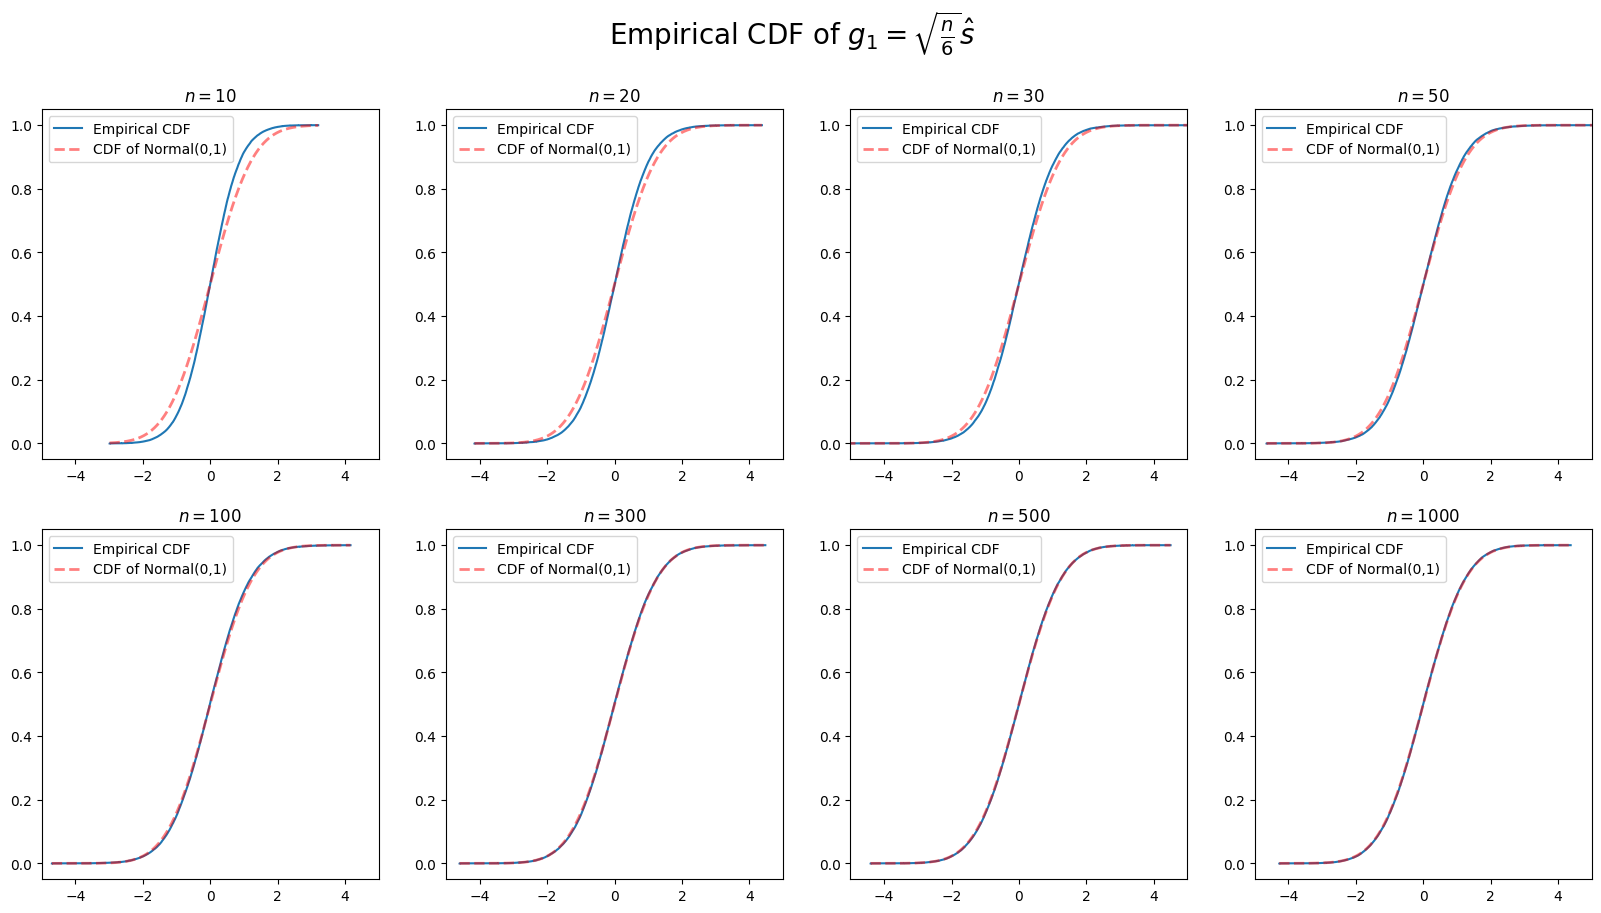

In [203]:
from scipy.stats import norm, skew, kurtosis, chi2
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # 樣本大小

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
y = np.arange(1, N + 1) / N

for i, axi in enumerate(ax.flat):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n[i]))
    # 計算 g1
    g1 = np.sqrt(n[i] / 6) * skew(x, axis=1)
    g1_sort = np.sort(g1)
    y_ = norm.cdf(g1_sort, loc=0, scale=1)  # 使用常態分佈的CDF

    # 繪製經驗CDF
    axi.plot(g1_sort, y, label='Empirical CDF', drawstyle='steps-pre')

    # 繪製常態分佈
    axi.plot(g1_sort, y_, label='CDF of Normal(0,1)', linewidth=2, color='r', linestyle='--', alpha=0.5)

    axi.legend()
    axi.set_xlim(-5, 5)
    axi.set_title(r'$n = %d$' % n[i])

plt.suptitle(r'Empirical CDF of $g_1 = \sqrt{\frac{n}{6}} \hat{s}$', fontsize=20)
plt.show()


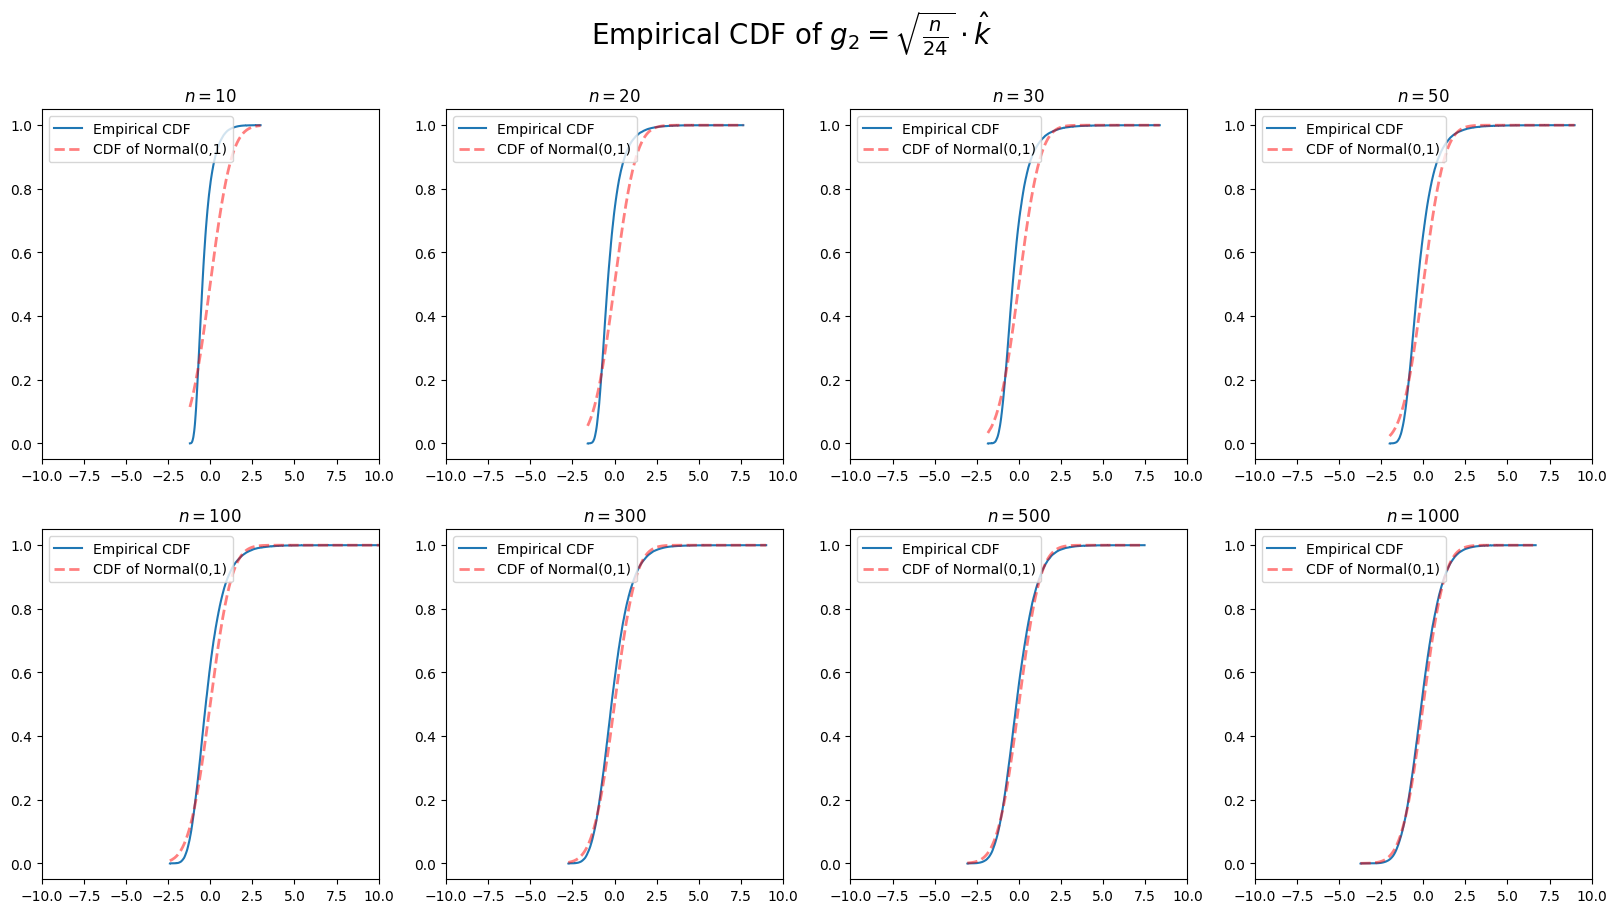

In [202]:
from scipy.stats import norm, skew, kurtosis, chi2
import numpy as np
import matplotlib.pyplot as plt

N = 50000  # 實驗次數
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # 樣本大小

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
y = np.arange(1, N + 1) / N

for i, axi in enumerate(ax.flat):
    # 生成隨機數
    x = norm.rvs(loc=0, scale=1, size=(N, n[i]))
    # 計算 g2
    g2 = np.sqrt(n[i] / 24) * kurtosis(x, axis=1, fisher=True)
    g2_sort = np.sort(g2)
    y_ = norm.cdf(g2_sort, loc=0, scale=1)  # 使用常態分佈的CDF

    # 繪製經驗CDF
    axi.plot(g2_sort, y, label='Empirical CDF', drawstyle='steps-pre')

    # 繪製常態分佈
    axi.plot(g2_sort, y_, label='CDF of Normal(0,1)', linewidth=2, color='r', linestyle='--', alpha=0.5)

    axi.legend()
    axi.set_xlim(-10, 10)
    axi.set_title(r'$n = %d$' % n[i])

plt.suptitle(r'Empirical CDF of $g_2 = \sqrt{\frac{n}{24}} \cdot \hat{k}$', fontsize=20)
plt.show()

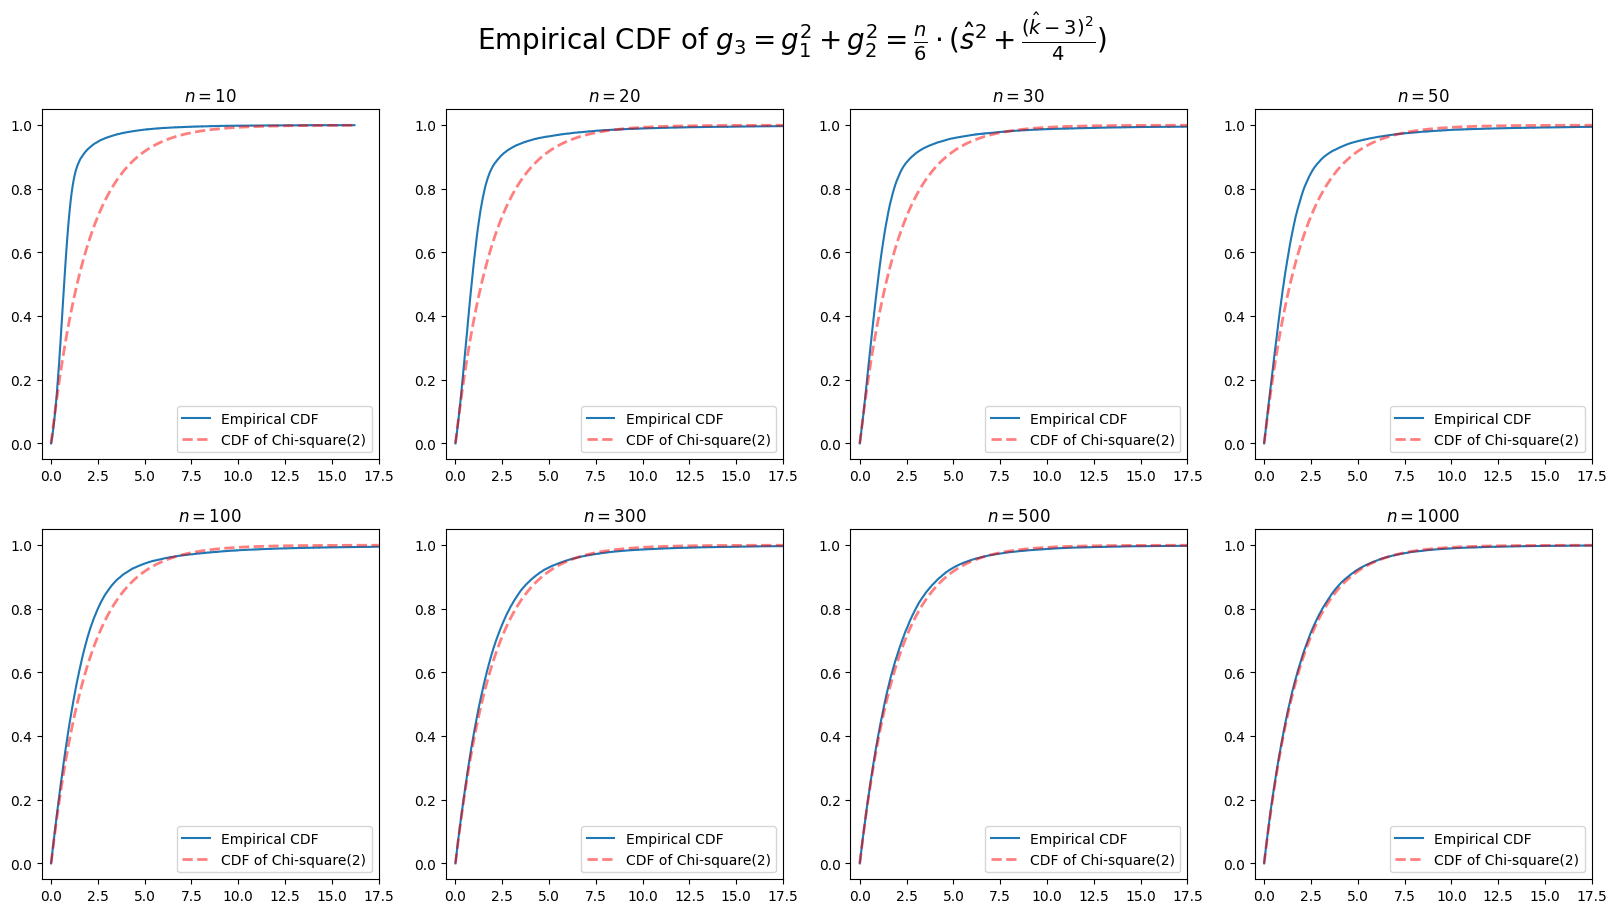

In [195]:
N = 50000 #experiment times
n = [10,20,30,50,100,300,500,1000] #sample size

fig, ax = plt.subplots(2,4,figsize=(20,10))
y = np.arange(1,N+1)/N

for i,axi in enumerate(ax.flat):
    # generate random numbers
    x = norm.rvs(loc=0, scale=1,size = (N,n[i]))
    g3 = (n[i]/6)*(skew(x,axis=1)**2+(kurtosis(x,axis=1,fisher=True)**2)/4)
    #g1 = np.sqrt(n[i]/6)*skew(x,axis=1)
    #g2 = np.sqrt(n[i]/24)*kurtosis(x,axis=1,fisher=True)
    #g3 = g1**2+g2**2
    g3_sort = np.sort(g3)
    y_ = chi2.cdf(g3_sort,df=2)

    #plot empirical CDF
    axi.plot(g3_sort,y,label='Empirical CDF',drawstyle = 'steps-pre')

    # #plot normal distribution
    # axi.plot(g2_sort,y_,label='CDF of N(0,1)',linewidth=2,color = 'r', linestyle = '--',
    # alpha = 0.5,)

    #plot chi-square distribution
    axi.plot(g3_sort,y_,label='CDF of Chi-square(2)',linewidth=2,color = 'r', linestyle = '--',
    alpha = 0.5,)

    axi.legend()
    axi.set_xlim(-0.5,17.5)
    axi.set_title(r'$n = %d$'%n[i])


plt.suptitle(r'Empirical CDF of $g_3 = g_1^2 + g_2^2 = \frac{n}{6} \cdot (\hat{s}^2+\frac{(\hat{k}-3)^2}{4})$',fontsize=20)
plt.show()

**<font color=skyblue>討論：</font>**

這樣更容易發現，當n越大時，G1、G2的ECDF越趨近於常態分佈，G3的ECDF越趨近於卡方分佈。


<hr>

4.將上述驗證程式改寫為一個副程式，假設取名為 stats, p_value = JB_test(x)，輸入參數 x 代表欲檢定是否為常態的一組資料。 輸出兩個結果，stats 為 G_3 檢定統計量的值，p_value 為檢定的 p-value。

In [191]:
import numpy as np
from scipy.stats import chi2

def JB_test(x):
    n = len(x)
    
    # 計算樣本的平均值、標準差、偏度和峰度
    x_bar = np.mean(x)
    s = np.std(x)
    skewness = (1/n) * np.sum(((x - x_bar) / s) ** 3)
    kurtosis = (1/n) * np.sum(((x - x_bar) / s) ** 4) - 3
    
    # 計算 Jarque-Bera 檢定統計量
    G_3 = (n / 6) * (skewness ** 2 + (kurtosis - 3) ** 2 / 4)
    
    # 計算 p-value
    p_value = 1 - chi2.cdf(G_3, df=2)
    
    return G_3, round(p_value, 3)

# 測試程式碼
data = np.random.normal(size=1000)  # 假設這是一組常態分佈的資料
stats, p_value = JB_test(data)
print(f"Jarque-Bera 檢定統計量: {stats}")
print(f"P-value: {p_value}")

Jarque-Bera 檢定統計量: 376.88866433668466
P-value: 0.0


<hr>
5. 接著檢驗檢定統計量 G_3 的檢定力。採蒙地卡羅模擬方式，步驟如下：

從下列的分配母體中抽樣：N(0,1), T(3), T(10), T(30), U(0,1), $\chi^2(8)$。

抽樣數 n=10, 20, 30, 50, 100, 300, 500。

實驗次數 N = 50000。

型一誤 $\alpha$ = 0.05。

對每個分配母體與樣本數，分別計算檢定力： $Power = P(Reject \; H_0 \;|\; H_a)$，其中 H_0: 資料來自常態；H_a: 資料來自其他分配。 最後針對每個母體，繪製如下圖的 Power vs. sample size。觀察檢定力受樣本數與母體來源（與常態的相似度）的影響。其中 Y 軸必須選擇合適的範圍，方能呈現出清楚的 power 值。

其實，當 H_a 來自常態時（也就是資料來自 H_0 的意思），此時的 Power 又稱為顯著水準，且理論上， Power 應該維持在所設定的型一誤 $\alpha$，即 0.05，如下圖左。因此，當檢定統計量無法維持既定的顯著水準時，後續的檢定力也不用做了。因為檢定統計量是根據 H_0 為真的條件下得到的，連「自己的出身」都維持不住，則檢定力也失去意義。

一般而言，檢定力會隨著樣本數增加而變大，亦即，樣本數大有利於辨認資料的「真偽」。

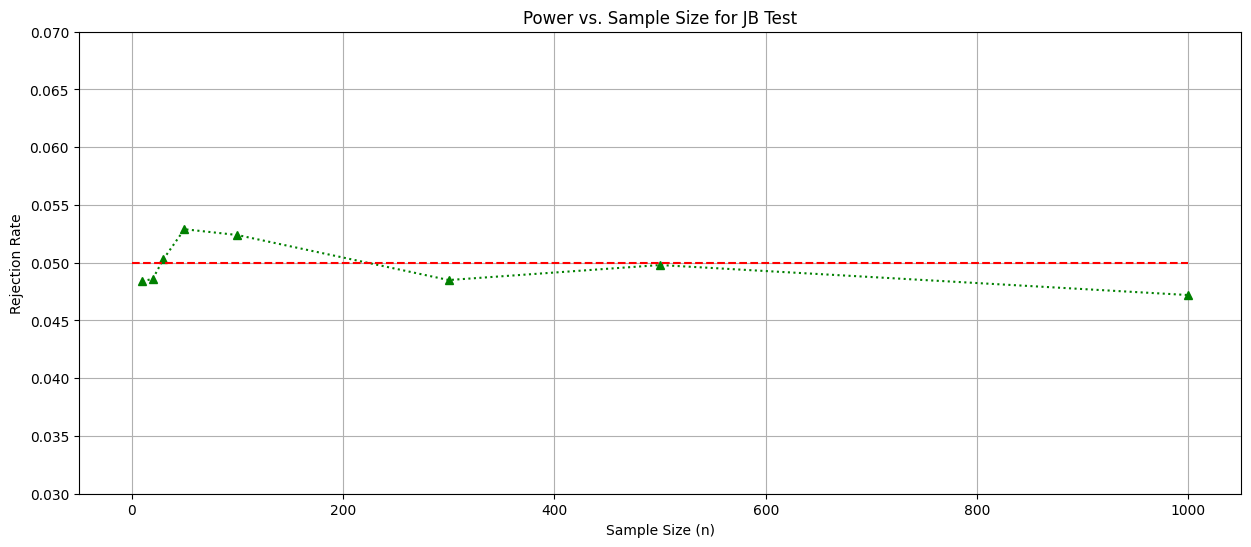

In [216]:
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, chi2
import numpy as np
from matplotlib.ticker import MultipleLocator

alpha = 0.05
N = 10000
n = [10, 20, 30, 50, 100, 300, 500, 1000]
fig, ax = plt.subplots(figsize=(15, 6))

# 計算 alpha/2 對應的 Z 值
cv = norm.ppf(1 - alpha/2)

rej_ratio = np.zeros((len(n), 3))

# 保持迴圈內容不變，僅稍作調整
for i, sample_size in enumerate(n):
    x = norm.rvs(size=(N, sample_size))
    g1 = np.sqrt(sample_size/6) * skew(x, bias=False, axis=1)
    g2 = np.sqrt(sample_size/24) * kurtosis(x, bias=False, axis=1)
    g3 = g1**2 + g2**2
    
    # 計算拒絕率
    rej_g1 = np.abs(g1) > cv
    rej_g2 = np.abs(g2) > cv
    rej_g3 = g3 > chi2.ppf(1-alpha, df=2)  # 直接使用 ppf 計算卡方臨界值
    
    rej = np.c_[rej_g1, rej_g2, rej_g3]
    rej_rate = np.mean(rej, axis=0)  
    rej_ratio[i] = rej_rate


ax.plot(n, rej_ratio[:, 2], linestyle=':', marker='^', color='green')

ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('Rejection Rate')
ax.set_title('Power vs. Sample Size for JB Test')
ax.hlines(0.05,xmin=0,xmax=1000,linestyles='--',color='red')
ax.set_ylim(0.03, 0.07)
ax.grid(True)

plt.show()




**<font color=skyblue>注意事項與討論：</font>**

當資料來自 H_0，檢定力也稱「顯著水準」，理論上必須維持在 $\alpha$ 值

可惜的點:無法調整x軸的標示比例，否則可以更清楚看到檢定力的變化。
<hr>


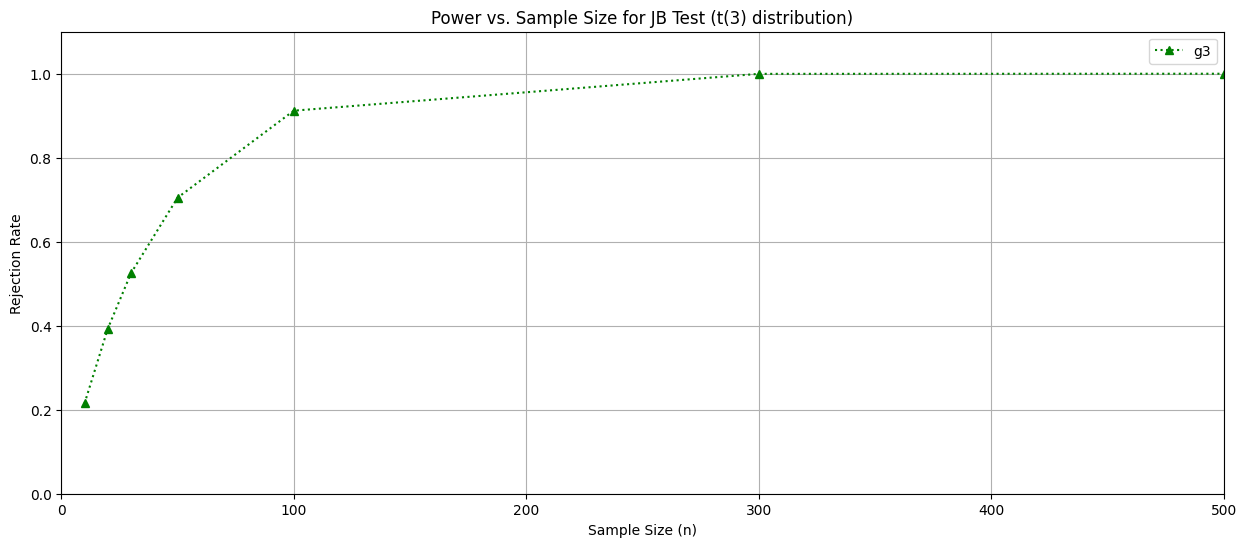

In [138]:
import matplotlib.pyplot as plt
from scipy.stats import t, skew, kurtosis, chi2
import numpy as np
from matplotlib.ticker import MultipleLocator

alpha = 0.05
N = 10000
n = [10, 20, 30, 50, 100, 300, 500, 1000]
fig, ax = plt.subplots(figsize=(15, 6))

# 計算 alpha/2 對應的 Z 值
cv = t.ppf(1 - alpha/2, df=3)  # 使用 t 分佈的臨界值

rej_ratio = np.zeros((len(n), 3))

# 保持迴圈內容不變，僅稍作調整
for i, sample_size in enumerate(n):
    # 生成 t 分佈的樣本
    x = t.rvs(df=3, size=(N, sample_size))
    
    g1 = np.sqrt(sample_size/6) * skew(x, bias=False, axis=1)
    g2 = np.sqrt(sample_size/24) * kurtosis(x, bias=False, axis=1)
    g3 = g1**2 + g2**2
    
    # 計算拒絕率
    rej_g1 = np.abs(g1) > cv
    rej_g2 = np.abs(g2) > cv
    rej_g3 = g3 > chi2.ppf(1-alpha, df=2)
    
    rej = np.c_[rej_g1, rej_g2, rej_g3]
    rej_rate = np.mean(rej, axis=0)  
    rej_ratio[i] = rej_rate

ax.plot(n, rej_ratio[:, 2], linestyle=':', marker='^', color='green')

ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('Rejection Rate')
ax.set_title('Power vs. Sample Size for JB Test (t(3) distribution)')
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 500)
ax.grid(True)

plt.show()


**<font color=skyblue>注意事項與討論：</font>**

當資料來自 H_a，檢定力隨著樣本數增加而變大。
<hr>

6. JB test 與其他常態檢定的產品。Anderson-Darling test 與本專題的 JB test 比較（蒙地卡羅實驗 5 萬次），第一張圖為顯著水準的維持，右圖為對 T(3) 。觀察兩者的檢定力，並討論其差異。

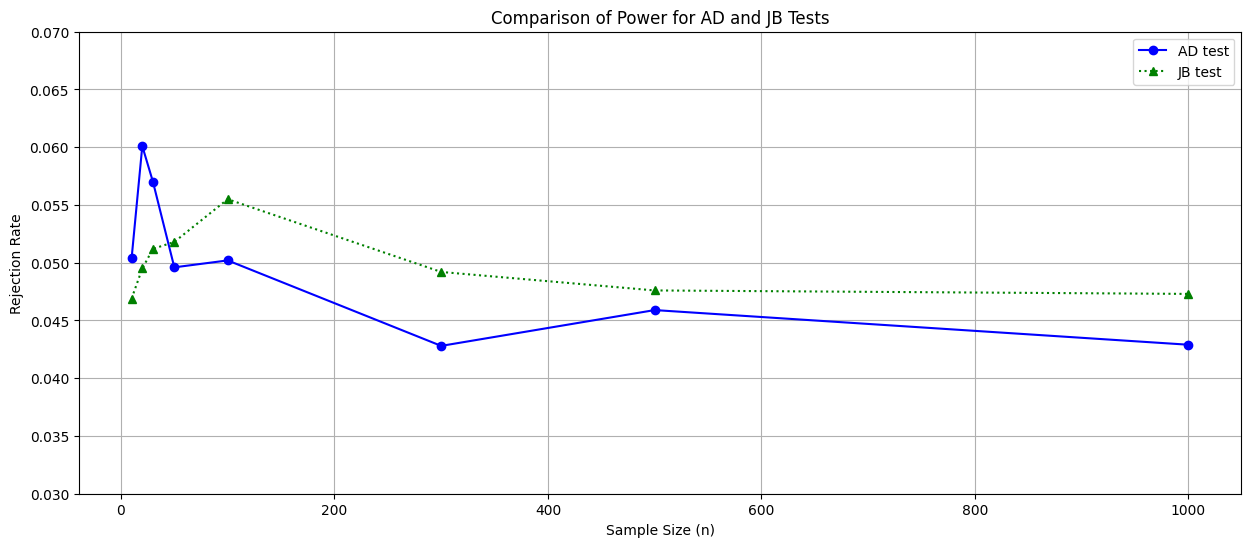

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import anderson, norm, skew, kurtosis, chi2
import numpy as np
from matplotlib.ticker import MultipleLocator

alpha = 0.05
N = 10000
n = [10, 20, 30, 50, 100, 300, 500, 1000]
fig, ax = plt.subplots(figsize=(15, 6))

# 計算 alpha/2 對應的 Z 值
cv_norm = norm.ppf(1 - alpha/2)

rej_ratio_ad = np.zeros((len(n), 3))
rej_ratio_jb = np.zeros((len(n), 3))

# Anderson-Darling 測試部分
for i, sample_size in enumerate(n):
    x_ad = np.random.randn(N, sample_size)
    
    ad_statistic = np.zeros(N)
    for j in range(N):
        ad_statistic[j] = anderson(x_ad[j], dist='norm').statistic
    
    rej_ad = ad_statistic > anderson(x_ad[0], dist='norm').critical_values[2]
    rej_ratio_ad[i, 2] = np.mean(rej_ad)

# JB 測試部分
for i, sample_size in enumerate(n):
    x_jb = norm.rvs(size=(N, sample_size))
    g1 = np.sqrt(sample_size/6) * skew(x_jb, bias=False, axis=1)
    g2 = np.sqrt(sample_size/24) * kurtosis(x_jb, bias=False, axis=1)
    g3 = g1**2 + g2**2
    
    rej_g1 = np.abs(g1) > cv_norm
    rej_g2 = np.abs(g2) > cv_norm
    rej_g3 = g3 > chi2.ppf(1-alpha, df=2)
    
    rej_jb = np.c_[rej_g1, rej_g2, rej_g3]
    rej_rate_jb = np.mean(rej_jb, axis=0)  
    rej_ratio_jb[i] = rej_rate_jb


# 繪製 Anderson-Darling 測試結果
ax.plot(n, rej_ratio_ad[:, 2], linestyle='-', marker='o', label='AD test', color='blue')

# 繪製 JB 測試結果
ax.plot(n, rej_ratio_jb[:, 2], linestyle=':', marker='^', label='JB test', color='green')

ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('Rejection Rate')
ax.set_title('Comparison of Power for AD and JB Tests')
ax.set_ylim(0.03,0.07)
# 設定 x 軸標記
ax.legend()
ax.grid(True)
plt.show()

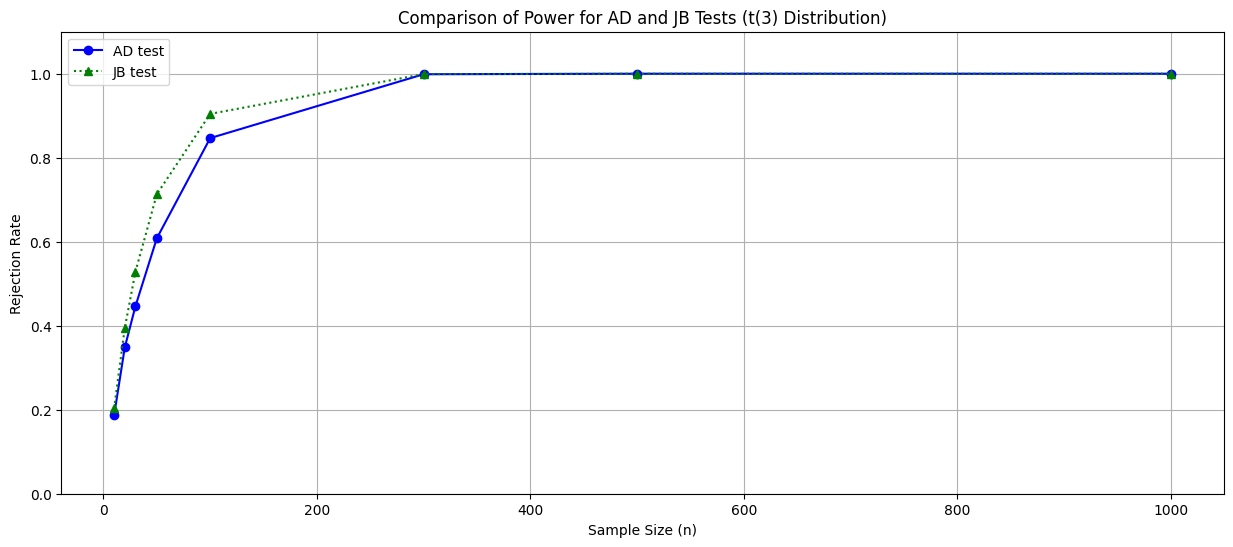

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import anderson, t, skew, kurtosis, chi2
import numpy as np
from matplotlib.ticker import MultipleLocator

alpha = 0.05
N = 10000
n = [10, 20, 30, 50, 100, 300, 500, 1000]
fig, ax = plt.subplots(figsize=(15, 6))

# 計算 alpha/2 對應的 t 值
cv_t = t.ppf(1 - alpha/2, df=3)

rej_ratio_ad = np.zeros((len(n), 3))
rej_ratio_jb = np.zeros((len(n), 3))

# Anderson-Darling 測試部分
for i, sample_size in enumerate(n):
    x_ad = t.rvs(df=3, size=(N, sample_size))
    
    ad_statistic = np.zeros(N)
    for j in range(N):
        ad_statistic[j] = anderson(x_ad[j], dist='norm').statistic
    
    rej_ad = ad_statistic > anderson(x_ad[0], dist='norm').critical_values[2]
    rej_ratio_ad[i, 2] = np.mean(rej_ad)

# JB 測試部分
for i, sample_size in enumerate(n):
    x_jb = t.rvs(df=3, size=(N, sample_size))
    g1 = np.sqrt(sample_size/6) * skew(x_jb, bias=False, axis=1)
    g2 = np.sqrt(sample_size/24) * kurtosis(x_jb, bias=False, axis=1)
    g3 = g1**2 + g2**2
    
    rej_g1 = np.abs(g1) > cv_t
    rej_g2 = np.abs(g2) > cv_t
    rej_g3 = g3 > chi2.ppf(1-alpha, df=2)
    
    rej_jb = np.c_[rej_g1, rej_g2, rej_g3]
    rej_rate_jb = np.mean(rej_jb, axis=0)  
    rej_ratio_jb[i] = rej_rate_jb


# 繪製 Anderson-Darling 測試結果
ax.plot(n, rej_ratio_ad[:, 2], linestyle='-', marker='o', label='AD test', color='blue')

# 繪製 JB 測試結果
ax.plot(n, rej_ratio_jb[:, 2], linestyle=':', marker='^', label='JB test', color='green')

ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('Rejection Rate')
ax.set_title('Comparison of Power for AD and JB Tests (t(3) Distribution)')
ax.set_ylim(0, 1.1)  # 調整 y 軸範圍
# 設定 x 軸標記
ax.legend()
ax.grid(True)
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
從左圖看出 scipy 的 anderson 指令在小樣本時，型一誤的維持較差，即便樣本數升高也比 JB test 差。另，右圖在對 T(3) 的檢定力也比 JB test 差，直到樣本數上升到 300 才趕上（本實驗沒有嘗試樣本數介於 100~300 之間）。雖然從下圖的比較中，JB test 優於 scipy 的 anderson，但這不意味著 JB test 比 Anderson-Darling test 好，很有可能是scipy 的這支 anderson 程式並沒有寫好。何況本專題的 JB test 在樣本數小於 2000 時，統計量並不滿足該有的卡方分配。讀者可以試試 scipy 的其他指令。

**<font color=skyblue>檢定補充說明：</font>**<br>
**Shapiro-Wilk 檢定：**

- **特點：** Shapiro-Wilk 檢定是一種基於樣本數小於 5000 的正態性檢定方法。它考慮了樣本的每個數據點，並計算一個 W 統計量。檢定的零假設是數據來自正態分佈。
- **適用情境：** 尤其適用於小樣本數據集的正態性檢定。

**Kolmogorov-Smirnov 檢定：**

- **特點：** Kolmogorov-Smirnov 檢定是一種基於樣本數較大的正態性檢定方法。它計算實際分佈與理論正態分佈之間的最大差異，並根據統計量進行檢定。
- **適用情境：** 對於大樣本數據集，Kolmogorov-Smirnov 檢定提供了一種簡單而有效的方法。

**Jarque-Bera 檢定：**

- **特點：** Jarque-Bera 檢定是一種對正態性進行綜合檢定的方法，同時考慮了偏態和峰態。它基於樣本的偏態和峰態統計量，並與正態分佈的期望值進行比較。
- **適用情境：** 對於樣本的偏態和峰態感興趣的情況下，Jarque-Bera 檢定提供了對正態性的更全面的檢測。

**D’Agostino’s 檢定：**

- **特點：** D’Agostino’s 檢定結合了偏態和峰態的信息，通過計算一個統計量進行正態性檢定。該檢定也是一種綜合性的方法，類似於 Jarque-Bera 檢定。
- **適用情境：** 類似於 Jarque-Bera 檢定，D’Agostino’s 檢定適用於對樣本的整體形狀進行正態性評估的情況。
<hr>


其他想法:使用不同的母體，觀察不同方法下檢定力的變化。

**<font color=green>觀察樣本數對檢定方法特徵的影響</font>**<br>
a-1. 母體為常態分佈，樣本數為10-1000。

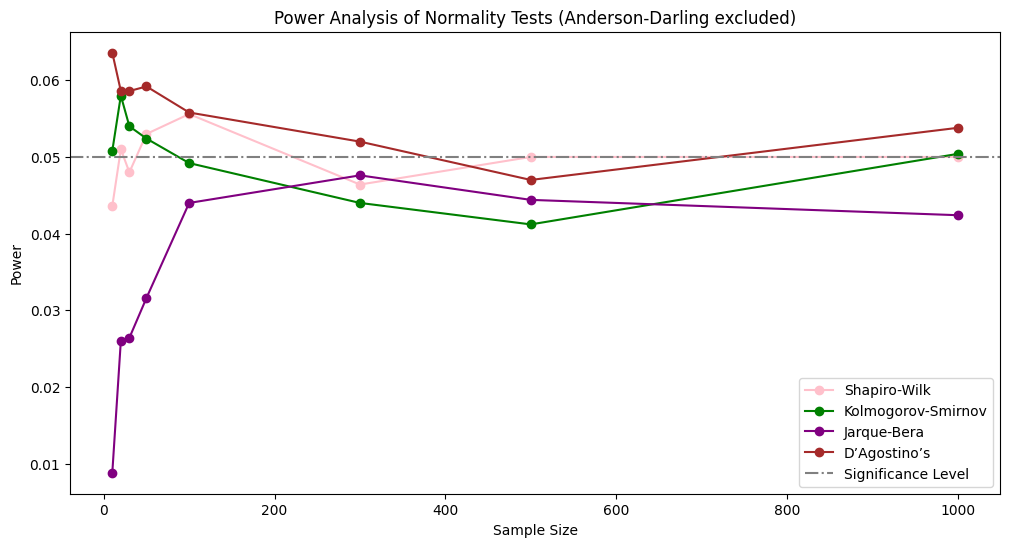

In [161]:
import numpy as np
from scipy.stats import shapiro, kstest, jarque_bera, normaltest
import matplotlib.pyplot as plt

def c_power(data, test_func, alpha=0.05, experiment=5000):
    reject_counts = [test_func(np.random.normal(0, 1, len(data)))[1] < alpha for _ in range(experiment)]
    power = np.mean(reject_counts)
    return power

alpha = 0.05
sample_sizes = [10, 20, 30, 50, 100, 300, 500, 1000]
test_functions = [shapiro, lambda x: kstest(x, 'norm'), jarque_bera, normaltest]
powers = np.zeros((len(sample_sizes), len(test_functions))) # for storaging
custom_labels = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Jarque-Bera', 'D’Agostino’s']

plt.figure(figsize=(12, 6))
# Color palette for lines
colors = ['pink', 'green', 'purple', 'brown']

for i, n in enumerate(sample_sizes):
    for j, test_func in enumerate(test_functions):
        data = np.random.normal(0, 1, n)
        powers[i, j] = c_power(data, test_func, alpha)

for j, (test_func, label, color) in enumerate(zip(test_functions, custom_labels, colors)):
    plt.plot(sample_sizes, powers[:, j], label=label, color=color, marker='o')

plt.axhline(alpha, color='gray', linestyle='-.', label='Significance Level')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis of Normality Tests')
plt.legend()
plt.show()


a-2. 母體為常態分佈，樣本數為500-20000。

c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


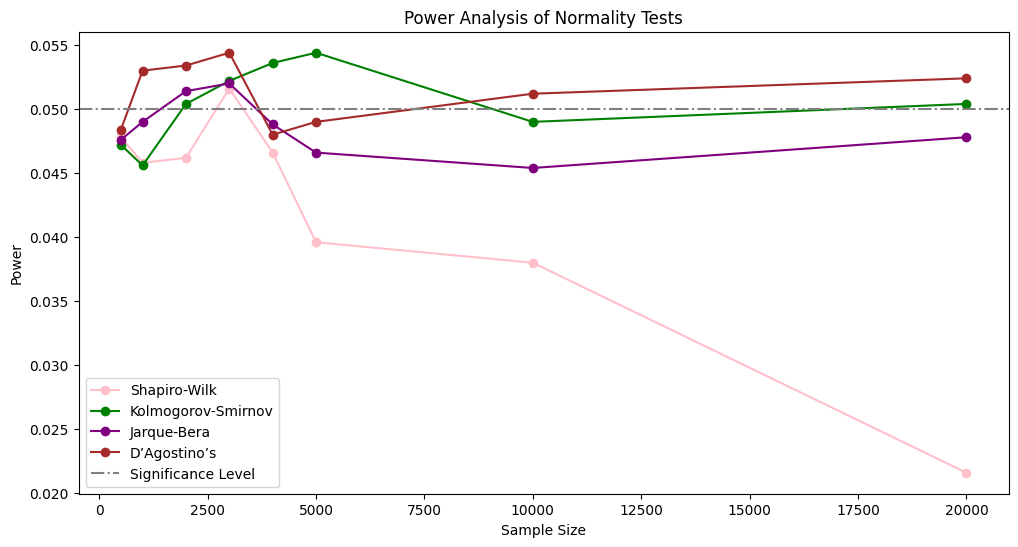

In [7]:
import numpy as np
from scipy.stats import shapiro, kstest, jarque_bera, normaltest
import matplotlib.pyplot as plt

def c_power(data, test_func, alpha=0.05, experiment=5000):
    reject_counts = [test_func(np.random.normal(0, 1, len(data)))[1] < alpha for _ in range(experiment)]
    power = np.mean(reject_counts)
    return power

alpha = 0.05
sample_sizes = [500, 1000, 2000, 3000, 4000, 5000, 10000,20000]
test_functions = [shapiro, lambda x: kstest(x, 'norm'), jarque_bera, normaltest]
powers = np.zeros((len(sample_sizes), len(test_functions))) # for storaging
custom_labels = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Jarque-Bera', 'D’Agostino’s']

plt.figure(figsize=(12, 6))
# Color palette for lines
colors = ['pink', 'green', 'purple', 'brown']

for i, n in enumerate(sample_sizes):
    for j, test_func in enumerate(test_functions):
        data = np.random.normal(0, 1, n)
        powers[i, j] = c_power(data, test_func, alpha)

for j, (test_func, label, color) in enumerate(zip(test_functions, custom_labels, colors)):
    plt.plot(sample_sizes, powers[:, j], label=label, color=color, marker='o')

plt.axhline(alpha, color='gray', linestyle='-.', label='Significance Level')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis of Normality Tests')
plt.legend()
plt.show()


**<font color=skyblue>注意事項與討論：</font>**<br>
當樣本數小時，無法看出不同檢定的特性，樣本落在2500左右時檢定力差不多。
但在樣本數提高至20000後，應證了Shapiro-Wilk是適合小樣本的方法。
<hr>

**<font color=green>觀察T分配自由度對檢定力的影響</font>**<br>
b-1. 母體為 t 分佈，自由度為3。

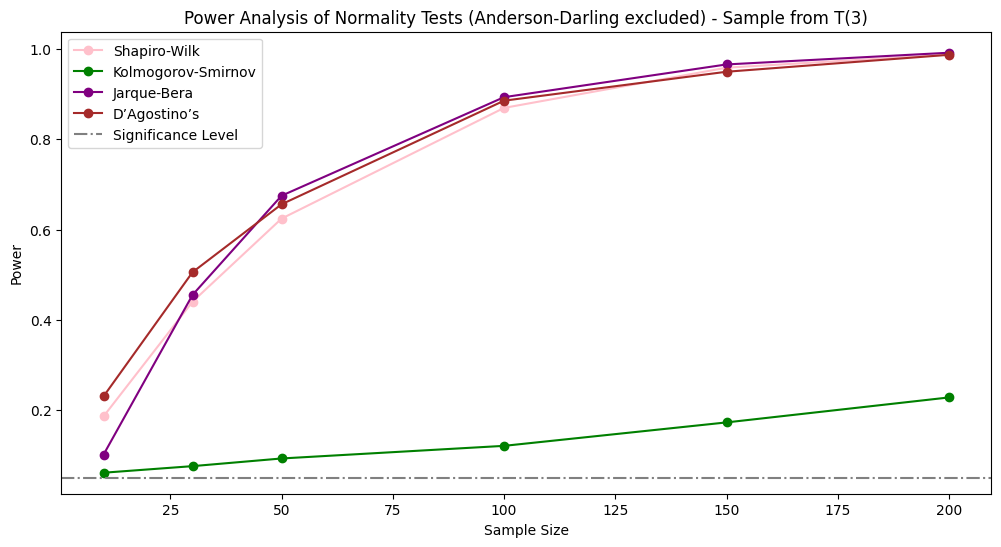

In [212]:
import numpy as np
from scipy.stats import shapiro, kstest, jarque_bera, normaltest, t
import matplotlib.pyplot as plt

def c_power(data, test_func, alpha=0.05, experiment=5000):
    reject_counts = [test_func(np.random.standard_t(3, size=len(data)))[1] < alpha for _ in range(experiment)]
    power = np.mean(reject_counts)
    return power

alpha = 0.05
sample_sizes = [10, 30, 50, 100,150, 200]
test_functions = [shapiro, lambda x: kstest(x, 'norm'), jarque_bera, normaltest]
powers = np.zeros((len(sample_sizes), len(test_functions))) # for storaging
custom_labels = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Jarque-Bera', 'D’Agostino’s']

plt.figure(figsize=(12, 6))
# Color palette for lines
colors = ['pink', 'green', 'purple', 'brown']

for i, n in enumerate(sample_sizes):
    for j, test_func in enumerate(test_functions):
        data = np.random.standard_t(3, size=n)
        powers[i, j] = c_power(data, test_func, alpha)

for j, (test_func, label, color) in enumerate(zip(test_functions, custom_labels, colors)):
    plt.plot(sample_sizes, powers[:, j], label=label, color=color, marker='o')

plt.axhline(alpha, color='gray', linestyle='-.', label='Significance Level')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis of Normality Tests (Anderson-Darling excluded) - Sample from T(3)')
plt.legend()
plt.show()

b-2. 母體為 t 分佈，自由度為10。

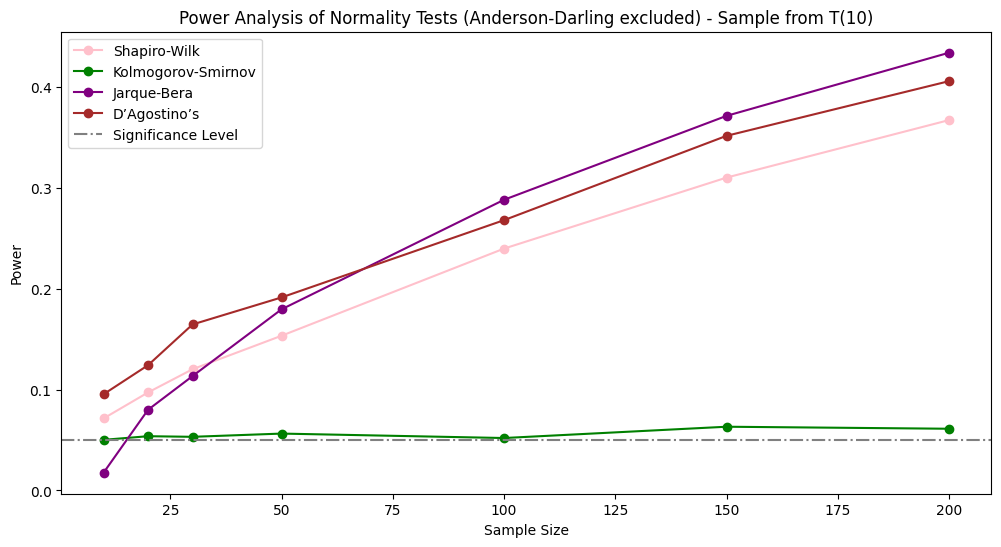

In [214]:
import numpy as np
from scipy.stats import shapiro, kstest, jarque_bera, normaltest, t
import matplotlib.pyplot as plt

def c_power(data, test_func, alpha=0.05, experiment=5000):
    reject_counts = [test_func(np.random.standard_t(10, size=len(data)))[1] < alpha for _ in range(experiment)]
    power = np.mean(reject_counts)
    return power

alpha = 0.05
sample_sizes = [10,20, 30, 50, 100,150, 200]
test_functions = [shapiro, lambda x: kstest(x, 'norm'), jarque_bera, normaltest]
powers = np.zeros((len(sample_sizes), len(test_functions))) # for storaging
custom_labels = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Jarque-Bera', 'D’Agostino’s']

plt.figure(figsize=(12, 6))
# Color palette for lines
colors = ['pink', 'green', 'purple', 'brown']

for i, n in enumerate(sample_sizes):
    for j, test_func in enumerate(test_functions):
        data = np.random.standard_t(3, size=n)
        powers[i, j] = c_power(data, test_func, alpha)

for j, (test_func, label, color) in enumerate(zip(test_functions, custom_labels, colors)):
    plt.plot(sample_sizes, powers[:, j], label=label, color=color, marker='o')

plt.axhline(alpha, color='gray', linestyle='-.', label='Significance Level')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis of Normality Tests (Anderson-Darling excluded) - Sample from T(10)')
plt.legend()
plt.show()

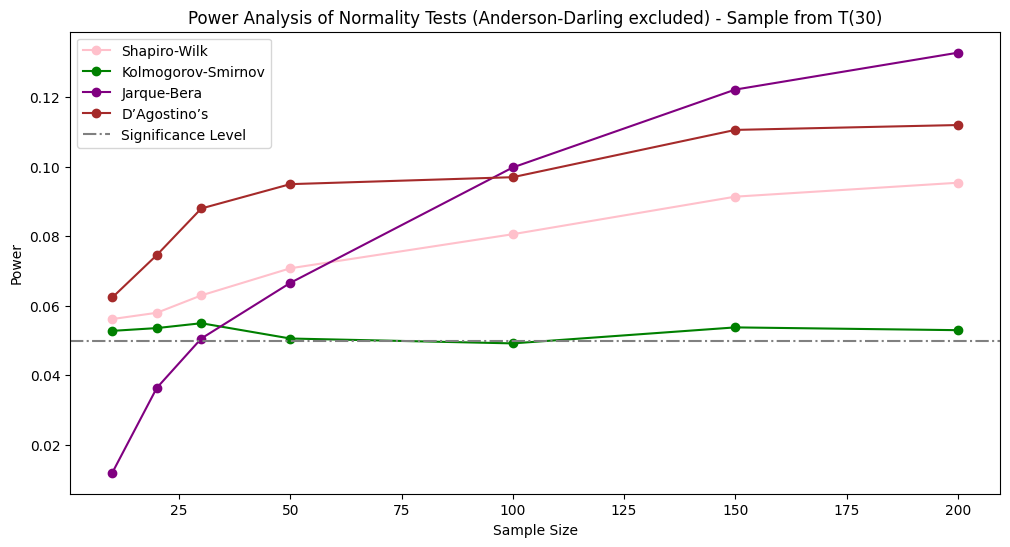

In [9]:
import numpy as np
from scipy.stats import shapiro, kstest, jarque_bera, normaltest, t
import matplotlib.pyplot as plt

def c_power(data, test_func, alpha=0.05, experiment=5000):
    reject_counts = [test_func(np.random.standard_t(30, size=len(data)))[1] < alpha for _ in range(experiment)]
    power = np.mean(reject_counts)
    return power

alpha = 0.05
sample_sizes = [10,20, 30, 50, 100,150, 200]
test_functions = [shapiro, lambda x: kstest(x, 'norm'), jarque_bera, normaltest]
powers = np.zeros((len(sample_sizes), len(test_functions))) # for storaging
custom_labels = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Jarque-Bera', 'D’Agostino’s']

plt.figure(figsize=(12, 6))
# Color palette for lines
colors = ['pink', 'green', 'purple', 'brown']

for i, n in enumerate(sample_sizes):
    for j, test_func in enumerate(test_functions):
        data = np.random.standard_t(3, size=n)
        powers[i, j] = c_power(data, test_func, alpha)

for j, (test_func, label, color) in enumerate(zip(test_functions, custom_labels, colors)):
    plt.plot(sample_sizes, powers[:, j], label=label, color=color, marker='o')

plt.axhline(alpha, color='gray', linestyle='-.', label='Significance Level')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis of Normality Tests (Anderson-Darling excluded) - Sample from T(30)')
plt.legend()
plt.show()

**<font color=skyblue>注意事項與討論</font>**<br>當t分佈的自由度增加時，其概率密度函數會趨近於標準正態分佈，因此樣本更接近正態分佈。當樣本本身已經接近正態分佈時，正態性檢定的檢定力會下降，因為檢定方法難以區分樣本是否真的來自正態分佈。

當自由度增加到30時，T分佈接近正態分佈，因此正態性檢定的檢定力降低。這也反映了在樣本足夠大且接近正態分佈時，正態性檢定可能變得不太靈敏。<hr>

**<font color=green>觀察均勻分配對檢定力的影響</font>**<br>
c. 母體為 t 分佈，自由度為10，樣本數1000。

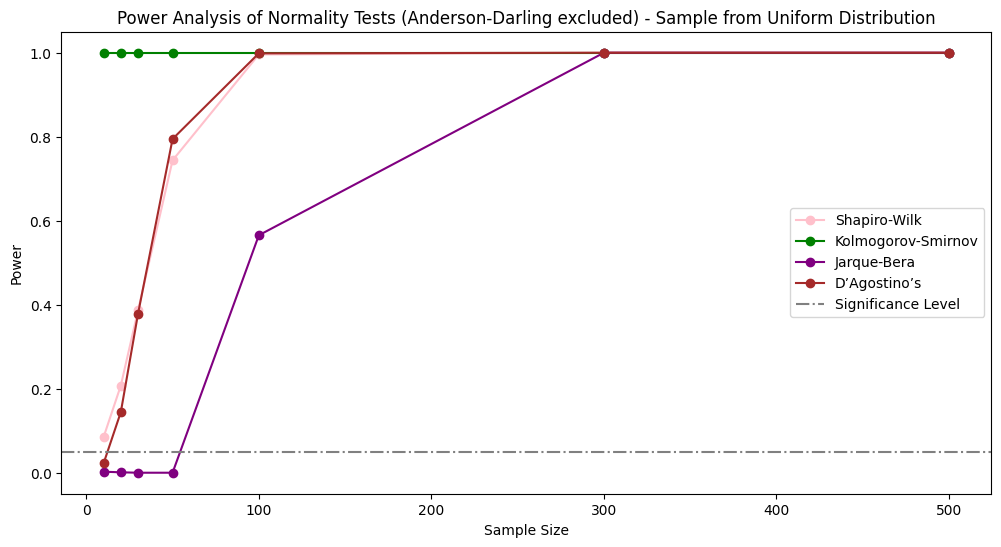

In [211]:
import numpy as np
from scipy.stats import shapiro, kstest, jarque_bera, normaltest, uniform
import matplotlib.pyplot as plt

def c_power(data, test_func, alpha=0.05, experiment=5000):
    reject_counts = [test_func(np.random.uniform(size=len(data)))[1] < alpha for _ in range(experiment)]
    power = np.mean(reject_counts)
    return power

alpha = 0.05
sample_sizes = [10, 20, 30, 50, 100, 300, 500]
test_functions = [shapiro, lambda x: kstest(x, 'norm'), jarque_bera, normaltest]
powers = np.zeros((len(sample_sizes), len(test_functions)))  # for storaging
custom_labels = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Jarque-Bera', 'D’Agostino’s']

plt.figure(figsize=(12, 6))
# Color palette for lines
colors = ['pink', 'green', 'purple', 'brown']

for i, n in enumerate(sample_sizes):
    for j, test_func in enumerate(test_functions):
        data = np.random.uniform(size=n)
        powers[i, j] = c_power(data, test_func, alpha)

for j, (test_func, label, color) in enumerate(zip(test_functions, custom_labels, colors)):
    plt.plot(sample_sizes, powers[:, j], label=label, color=color, marker='o')

plt.axhline(alpha, color='gray', linestyle='-.', label='Significance Level')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis of Normality Tests (Anderson-Darling excluded) - Sample from Uniform Distribution')
plt.legend()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
在樣本數超過300後，全部的檢定力皆為1。<br>結果顯示，當樣本來自均勻分布時，四種檢定方法的檢定力在樣本數超過一定閾值後趨於1。這是因為均勻分布是一種常見的非正態分布，當樣本數足夠大時，中心極限定理使得樣本平均數的分佈趨近於正態分佈。因此，正態性檢定方法在樣本足夠大的情況下往往能夠正確地拒絕虛無假設，即具有高檢定力。

**<font color=skyblue>反思：</font>**<br>

我認為這次專題最困難的是要確定自己畫出來的圖符合統計的理論，當基礎不夠扎實，畫出來的可能會是錯的。因此，我花了很多時間去研究，並且試著去理解，最後才畫出來。這次專題讓我學習到很多，也讓我更加了解統計的重要性，以及統計的應用。